Non-Linearity of `Sigmoid Activation Function` with a ANN having

`2 input layer`, `1 hidden layer (5 neurons)`, `1 output layer`

In [14]:
# creating circle samples
import pandas as pd
from sklearn.datasets import make_circles


n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.08,  
                    random_state=42) 


In [15]:

circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y
                        })
circles.head(10)

,X1,X2,label
0,0.724148,0.269493,1
1,-0.700842,0.191841,1
2,-0.851559,0.294974,1
3,-0.482243,0.641251,1
4,0.450694,-0.892254,0
5,-0.455244,0.755441,1
6,-0.019641,0.809035,1
7,0.741787,0.177176,1
8,-0.185246,-0.809409,1
9,-0.094312,1.073255,0


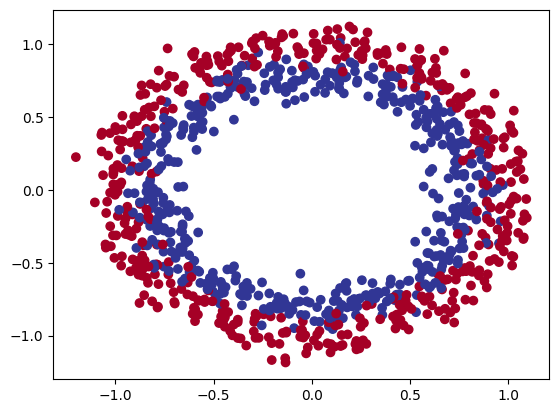

In [16]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

In this we have `X1`, `X2`, `label` as features



In [17]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

In [18]:
# making a training and testing data, 80% training, 20% testing

X_train, X_test = X[:800], X[800:]
y_train, y_test = y[:800], y[800:]

y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
print(y_train.shape)
print(y_test.shape)

(800, 1)
(200, 1)


In [19]:
# creating a model with 2 input, 1 hidden layer (5 neurons), 1 output 
# for making the accurate predictions

import numpy as np
np.random.seed(42)

# input layer -> hidden layer
w_input_hidden = np.random.uniform(low=-1.0, high=1.0, size=(2,5))
b_hidden = np.zeros((1,5))


print(w_input_hidden.shape)
print(w_input_hidden)

print(b_hidden.shape)
print(b_hidden)

(2, 5)
[[-0.25091976  0.90142861  0.46398788  0.19731697 -0.68796272]
 [-0.68801096 -0.88383278  0.73235229  0.20223002  0.41614516]]
(1, 5)
[[0. 0. 0. 0. 0.]]


In [20]:
# hidden layer -> output layer
w_hidden_output = np.random.uniform(low=-1.0, high=1.0, size=(5,1))
b_output=np.zeros((1,1))

print(w_hidden_output.shape)
print(w_hidden_output)

print(b_output.shape)
print(b_output)


(5, 1)
[[-0.95883101]
 [ 0.9398197 ]
 [ 0.66488528]
 [-0.57532178]
 [-0.63635007]]
(1, 1)
[[0.]]


In [21]:
# sigmoid activation function
def sigmoid(z):
    return 1/(1+np.exp(-z))


In [22]:
# model workflow
z_input_hidden = X_train@w_input_hidden+b_hidden
a_input_hidden = sigmoid(z_input_hidden) # (800,5)

z_hidden_output = a_input_hidden@w_hidden_output+b_output
a_hidden_output = sigmoid(z_hidden_output) # (800,1)


print(w_hidden_output.shape)
print(b_output.shape)
print(w_input_hidden.shape)
print(b_hidden.shape)

(5, 1)
(1, 1)
(2, 5)
(1, 5)


In [23]:
LR=0.01
epochs=10000

for epoch in range(epochs):
    # FORWARD PASS
    # input -> hidden
    z_input_hidden = X_train@w_input_hidden+b_hidden
    a_input_hidden = sigmoid(z_input_hidden)  # (800,5)

    # hidden -> output
    z_hidden_output = a_input_hidden@w_hidden_output+b_output
    y_train_pred = sigmoid(z_hidden_output)  # (800,1)

    # loss function
    L=0.5*(y_train_pred - y_train)**2

    # BACKPROPAGATION
    # output -> hidden
    # weight gradients
    # dL/dw_hidden_output = dL/dy_pred * dy_pred/dz_hidden_otuput * dz_hidden_output/dw_hidden_output
    # dL/dz_hidden_output = dL/dy_pred * dy_pred/dz_hidden_otuput

    # dL/dy_pred = (y_train_pred - y_train)
    dL_dy_pred = (y_train_pred - y_train) # (800,1)

    # dy_pred/dz_hidden_otuput
    dy_pred_dz_hidden_output = y_train_pred * (1-y_train_pred) # (800,1)

    # dz_hidden_output/dw_hidden_output
    dz_hidden_output_dw_hidden_output = a_input_hidden # (800,5)

    # dL/dz_hidden_output = dL/dy_pred * dy_pred/dz_hidden_otuput
    dL_dz_hidden_output = dL_dy_pred * dy_pred_dz_hidden_output # (800,1)

    # dL/dw_hidden_output = dL/dz_hidden_output * dz_hidden_output/dw_hidden_output
    dL_dw_hidden_output = dz_hidden_output_dw_hidden_output.T @ dL_dz_hidden_output # (5,1)

    # bias gradients
    # dL/db_output = dL/dy_pred * dy_pred/dz_hidden_otuput * dz_hidden_otuput/db_output
    # dL/dz_hidden_output = dL/dy_pred * dy_pred/dz_hidden_otuput
    dz_hidden_output_db_output = 1
    dL_db_output = np.sum(dL_dz_hidden_output, axis=0, keepdims=True) # (1,1)


    # hidden -> input
    # weight gradients
    # (2,5)
    # dL/dw_input_hidden = dL/da_input_hidden * da_input_hidden/dz_input_hidden * dz_input_hidden/dw_input_hidden
    # dL/da_input_hidden = dL/dy_pred * dy_pred/dz_hidden_output * dz_hidden_output/da_input_hidden
    # da_input_hidden/dz_input_hidden = a_input_hidden * (1 - a_input_hidden)
    # dz_input_hidden/dw_input_hidden = X_train 

    # da_input_hidden/dz_input_hidden = a_input_hidden * (1 - a_input_hidden)
    da_input_hidden_dz_input_hidden = a_input_hidden * (1 - a_input_hidden) # (800,5)

    # dz_input_hidden/dw_input_hidden = X_train
    dz_input_hidden_dw_input_hidden = X_train # (800,2)

    # dL/da_input_hidden = dL/dy_pred * dy_pred/dz_hidden_output * dz_hidden_output/da_input_hidden
    # dL/dz_hidden_output = dL/dy_pred * dy_pred/dz_hidden_otuput # (800,1)
    # dz_hidden_output/da_input_hidden = w_hidden_output
    dz_hidden_output_da_input_hidden = w_hidden_output # (5,1)
    dL_da_input_hidden = dL_dz_hidden_output @ dz_hidden_output_da_input_hidden.T # (800,5)

    # dL/dz_input_hidden = dL/da_input_hidden * da_input_hidden/dz_input_hidden
    dL_dz_input_hidden = dL_da_input_hidden * da_input_hidden_dz_input_hidden # (800,5)

    # dL/dw_input_hidden = dL/dz_input_hidden * dz_input_hidden/dw_input_hidden
    dL_dw_input_hidden = dz_input_hidden_dw_input_hidden.T @ dL_dz_input_hidden # (2,5)

    # bias gradients
    # (1,5)
    # dL/db_hidden = dL/dz_input_hidden * dz_input_hidden/db_hidden
    # dL/dz_input_hidden = dL/da_input_hidden * da_input_hidden/dz_input_hidden # (800,5)
    dz_input_hidden_db_hidden = 1
    dL_db_hidden = np.sum(dL_dz_input_hidden, axis=0, keepdims=True) # (1,5)


    # UPDATION
    # output -> hidden
    w_hidden_output -= LR*dL_dw_hidden_output
    b_output -= LR*dL_db_output

    # hidden -> input
    w_input_hidden -= LR*dL_dw_input_hidden
    b_hidden -= LR*dL_db_hidden


    if (epoch+1) %100 == 0:
        print(
            f"Epoch : {epoch+1}| Train Loss : {L.mean():.6f} | y_train_pred : {y_train_pred.mean():.6f}")



Epoch : 100| Train Loss : 0.124492 | y_train_pred : 0.501906
Epoch : 200| Train Loss : 0.123745 | y_train_pred : 0.502402
Epoch : 300| Train Loss : 0.121679 | y_train_pred : 0.503299
Epoch : 400| Train Loss : 0.118255 | y_train_pred : 0.504757
Epoch : 500| Train Loss : 0.108727 | y_train_pred : 0.503983
Epoch : 600| Train Loss : 0.091415 | y_train_pred : 0.502735
Epoch : 700| Train Loss : 0.080276 | y_train_pred : 0.501964
Epoch : 800| Train Loss : 0.073376 | y_train_pred : 0.502124
Epoch : 900| Train Loss : 0.068601 | y_train_pred : 0.502655
Epoch : 1000| Train Loss : 0.065081 | y_train_pred : 0.505484
Epoch : 1100| Train Loss : 0.072140 | y_train_pred : 0.614827
Epoch : 1200| Train Loss : 0.068654 | y_train_pred : 0.605555
Epoch : 1300| Train Loss : 0.065911 | y_train_pred : 0.600191
Epoch : 1400| Train Loss : 0.063310 | y_train_pred : 0.594506
Epoch : 1500| Train Loss : 0.061116 | y_train_pred : 0.589147
Epoch : 1600| Train Loss : 0.059581 | y_train_pred : 0.586942
Epoch : 1700| Tra

In [24]:
# updated values
print(w_hidden_output)
print(b_hidden)

print(w_hidden_output)
print(b_output)

[[-17.45968603]
 [ 11.40116548]
 [  9.22992114]
 [-20.763775  ]
 [-19.03814755]]
[[-5.34921051  5.09150596  3.50092653 -3.51483329 -6.04714616]]
[[-17.45968603]
 [ 11.40116548]
 [  9.22992114]
 [-20.763775  ]
 [-19.03814755]]
[[-5.65850348]]


In [25]:
# # Testing
# # only forward pass 
# z_input_hidden = X_test@w_input_hidden+b_hidden
# a_input_hidden = sigmoid(z_input_hidden)  # (200,5)

# # hidden -> output
# z_hidden_output = a_input_hidden@w_hidden_output+b_output
# y_test_pred = sigmoid(z_hidden_output)  # (200,1)


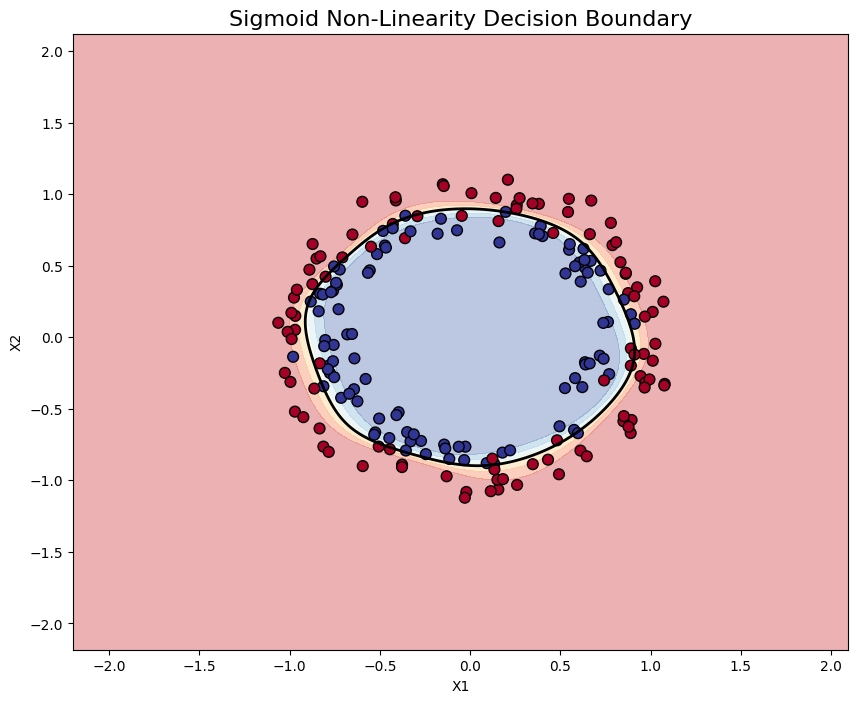

In [26]:
# plotting decision boundary
plt.figure(figsize=(10, 8))

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)
grid = np.c_[xx.ravel(), yy.ravel()]   # shape (90000, 2)

# FORWARD PASS IN TESTING
z1 = grid @ w_input_hidden + b_hidden
a1 = sigmoid(z1)
z2 = a1 @ w_hidden_output + b_output
grid_pred = sigmoid(z2).reshape(xx.shape)

# plot decision boundary
plt.contourf(xx, yy, grid_pred, alpha=0.35, cmap=plt.cm.RdYlBu)

# plot 0.5 classification boundary line 
plt.contour(xx, yy, grid_pred, levels=[0.5], colors='black', linewidths=2)

# plot real test points on top
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=60,
            edgecolor="k", cmap=plt.cm.RdYlBu)

plt.title("Sigmoid Non-Linearity Decision Boundary", fontsize=16)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()
